In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image, display
import pydotplus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
bc = load_breast_cancer()
data=bc.data
target=bc.target


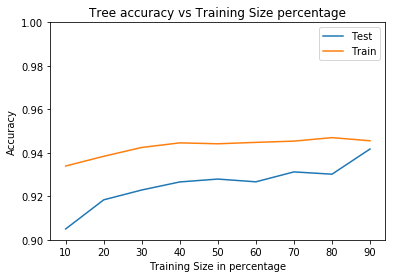

In [7]:
NUM_TIMS_TO_RUN=50
TRAIN_SIZE=10
sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])
for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    for i in range(1,TRAIN_SIZE):
        clf = KNeighborsClassifier()
        #clf = tree.DecisionTreeClassifier()
        train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=1-i/10.0)
        clf.fit(train_data, train_target)
        #Fit train Data and test against test data
        clf.fit(train_data, train_target)
        test_accuracy_list.append([i*10,clf.score(test_data,test_target)])
        
        #Ftest against training data
        train_accuracy_list.append([i*10,clf.score(train_data,train_target)])
    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
    sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
#print avg_train_prediction, avg_test_prediction
plt.xlabel('Training Size in percentage')
plt.ylabel('Accuracy')
plt.ylim((0.9,1))
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Tree accuracy vs Training Size percentage')
plt.legend()
plt.show()

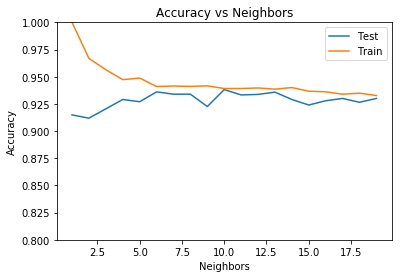

In [18]:
NUM_TIMS_TO_RUN=50
NEIGHBORS=20
sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])

for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    for i in range(1,NEIGHBORS):
        clf = KNeighborsClassifier(n_neighbors = i)
        train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.15)
        #Fit train Data and test against test data
        clf.fit(train_data, train_target)
        test_accuracy_list.append([i,clf.score(test_data,test_target)])
        
        #Ftest against training data
        train_accuracy_list.append([i,clf.score(train_data,train_target)])
    
    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
    sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
#print avg_test_prediction, avg_train_prediction
#print avg_train_prediction,avg_test_prediction
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.ylim((.8,1))
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Accuracy vs Neighbors')
plt.legend()
plt.show()


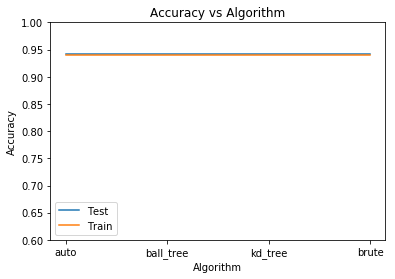

In [11]:
NUM_TIMS_TO_RUN=10
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.15)

for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    counter=0
    for i in algorithm:
        clf = KNeighborsClassifier(algorithm = i)
        #Fit train Data and test against test data
        clf.fit(train_data, train_target)
        test_accuracy_list.append([counter,clf.score(test_data,test_target)])
        #print test_accuracy_list
        #Ftest against training data
        train_accuracy_list.append([counter,clf.score(train_data,train_target)])
        counter=counter+1

    
    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
    sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
#print avg_test_prediction, avg_train_prediction

plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim((.6,1))
plt.xticks(avg_test_prediction[:,0],algorithm)
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Accuracy vs Algorithm')
plt.legend()
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.25)
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
neighbors=np.arange(1, 20)

skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state=268)
param_grid = {'algorithm': algorithm,
             'n_neighbors' : neighbors,
             }
#create a grid
grid_tree = GridSearchCV(KNeighborsClassifier(), param_grid, scoring = 'accuracy', n_jobs=-1, cv=skf)

#training
%time grid_tree.fit(train_data, train_target)

#let's see the best estimator
best_tree = grid_tree.best_estimator_
print(best_tree)
print("_"*40)
#with its score
print("Cross-validated best score {}%".format(round(grid_tree.best_score_ * 100,3)))
#score on test
predictions = best_tree.predict(test_data)
print("Test score: {}%".format(round(accuracy_score(y_true = test_target, y_pred = predictions) * 100,3)))



Wall time: 930 ms
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')
________________________________________
Cross-validated best score 93.192%
Test score: 93.706%
